***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility Space](4_0_introduction.ipynb)
    * Previous: [4.0 Introduction](4_0_introduction.ipynb)
    * Next: [4.2 The Baseline and its Representation in Space](4_2_the_baseline_and_its_representation_in_space.ipynb)

***

Import standard modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [2]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

# 4.1 周期函数和傅里叶分析
# 4.1 Periodic Functions and Fourier Analysis

<span style="background-color:red">TLG:MC: Merge the fundamentals about Fourier series and Fourier transform into chapter two. Keep the physics related to visibilities here, for instance the point source stuff and the Gaussian source stuff. Cut down in size.</span>

<span style="background-color:red">TLG:RC: Reduce your use of subsections. You go way to deep into subsections.</span>

本章我们将简单介绍波以及傅里叶分析，我们的目标是尽可能明确地进行傅立叶分析，同时仍然进行足够的深度以使学生培养良好的物理直觉。
关于命名的说明：在文献中，根据命名规则，傅里叶空间可以被称为相空间，傅立叶空间，k-空间，可见空间，$uv$-空间等。 在本书中，这些术语可以互换使用，即它们有着相同的含义。

<span style="background-color:cyan">TLG:GM: 这些定义是否在词汇表中？ 尤其是傅立叶分析

***
In this section, we will talk briefly about waves, then introduce Fourier analysis. Our aim is to make Fourier analysis as obvious as possible, while still going into sufficient depth to allow students to develop a good physical intuition.

A short note on nomenclature: in the literature, Fourier space can be referred to as *phase space*, *Fourier space*, *$k$-space*, *visibility space*, *uv-space* and more besides depending on the discipline. In this book, these terms will be used interchangeably: they all mean the same thing.

<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary? Fourier analysis especially.</span>


### 4.1.1 周期函数
### 4.1.1 Periodic Functions

本小节将简要描述周期函数的一些重要性质（在 [$\S$2.2](../2_Mathematical_Groundwork/2_2_important_functions.ipynb) 中已有详细的描述，在此仅作为提醒）。

***
Here, we will provide a very brief reminder of important properties of periodic functions. These should already be covered - and in greater detail - in [$\S$2.2](../2_Mathematical_Groundwork/2_2_important_functions.ipynb). This should therefore not be new material, but things to keep in mind as you read this chapter.

#### 4.1.1.1 周期函数的性质
#### 4.1.1.1 Characteristics of a Periodic Function

周期函数是无穷的重复函数，最简单的周期函数是简单的正弦函数（*sine*）:

***
A periodic function is an endlessly repeating function. The simplest periodic function is the humble *sine* function:

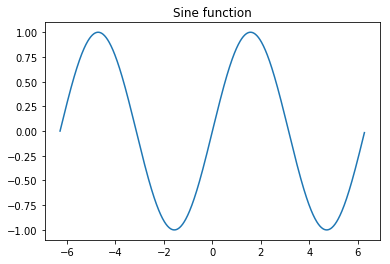

In [15]:
x=(np.arange(800)-400)/200.*np.pi
plt.title("Sine function")
plt.plot(x,np.sin(x))

**图4.1.1**: 简单的正弦函数

**Figure 4.1.1**: A simple sine function

可以用两个变量来定义一个周期函数，即幅值（*amplitude*）和频率（*frequency*）。幅值定义了波的大小，频率则定义了波重复的频率。在上图（图4.1.1）的实例中，幅值和频率均设置为1，因此，函数每 $2\pi$ 重复一次，幅值为1。可以将幅值为1，周期为 $2\pi$ 的 *sine* 函的值理解为半径为1的圆周上的点在y轴上的投影。

另有两个常量可以添加到周期函数中：幅值偏移（*amplitude offset*）和相位偏移（*phase offset*）。

***
Two quantities define a periodic function: *amplitude* and *frequency*. 
<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>
Amplitude defines the size of the wave; frequency defines how often the wave repeats. In the example above, both are set to 1; the function therefore repeats every $2\pi$ (since the sin function is the y-projection of a particle moving in a circular orbit), and has an amplitude of 1 (since the aforementioned orbit is of unit radius).

Two constants can also be added to a periodic function: *amplitude offset* and *phase offset*. 
<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>
A more general expression for our basic periodic function would therefore be:

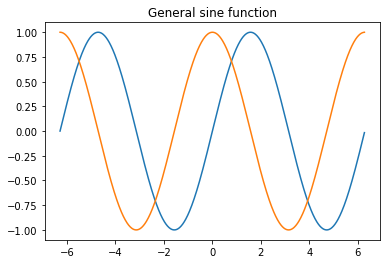

In [16]:
amplitude        = 1
frequency        = 1
phase_offset     = np.pi/2.
amplitude_offset = 0
plt.title("General sine function")
plt.plot(x,np.sin(x))
plt.plot(x,amplitude*np.sin(frequency*x+phase_offset)+amplitude_offset)

**图4.1.2**：基本正弦函数与修改参数发生的变化对比

**Figure 4.1.2**: Comparison between a basic sine function and what happens when you play with its parameters

建议对上图中的参数进行修改以加深理解，例如，将幅值设置为-1时会发生什么？将幅值设置为-1，相位偏移设置为$ \pi$ 又会发生什么？

**提醒：** 将sine函数的相位偏移设置为 $\frac{\pi}{2}$，会得到一个不同的周期函数——余弦函数（*cosine*）。

***
I strongly encourage you to play with the graph above - for example, what happens when you set the amplitude to -1 ? What happens if you set the amplitude to -1 and the phase offset to $\pi$? 

<div class=advice>
**N.B.** Note that setting the phase offset of a sine function to $\frac{\pi}{2}$ gives you a *different* periodic function: a cosine function.
</div>

<div class=warn>
在许多物理教科书中，给出了频率 $f$ 与角频率 $\omega$ 的关系，如下：
<center>$\omega = 2\pi f$</center>
    
***
In many physics textbooks, the frequency $f$ may be referred to as the *angular frequency* $\omega$. The two are linked by the following relation:

<center>$\omega = 2\pi f$</center>
</div>

<span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>

#### 4.1.1.2 复杂周期函数
#### 4.1.1.2 Complex Periodic Functions

当前存在的周期函数都是由简单正弦函数组成，其中物理学家最感兴趣的周期函数之一是复杂周期函数的指数形式（可用于描述电磁波），由欧拉公式定义：
<div class=warn>
<center>$e^{ix} = \cos(x) + i \sin(x)$</center>
</div>

在本节的剩余部分，我们将使用正弦和指数两种形式来表示周期函数。

***
There exist many periodic functions, all built from the humble sine function. One of particular interest to physicists - for it helps us describe electromagnetic waves - is the exponential form of the complex periodic function, as defined by Euler's formula:
<div class=warn>
<center>$e^{ix} = \cos(x) + i \sin(x)$</center>
</div>
For the remainder of this section, we will use both sine and exponential forms of periodic functions.

### 4.1.2 傅里叶分析：信号重建
### 4.1.2 Fourier analysis: Reconstructing Signals

现在，我们将回顾傅里叶分析的相关属性，再次强调在开始深入研究本节其余部分时要记住的关键概念。 所有这些内容在 [$\S$2.3](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb) 中有更详细的描述。

***
We will now go over relevant properties of Fourier analysis, again to highlight key concepts to keep in mind when you start delving into the rest of this section. All of this content is described in greater detail in [$\S$2.3](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb).

#### 4.1.2.1 傅里叶级数
#### 4.1.2.1 Fourier Series

<span style="background-color:red">TLG:MC: Merge into 2.3. Try to add to that section
bringing with it some simplicity. Merge your explanation with what is there.</span>


法国数学家约瑟夫·傅里叶的一个重要发现是，在有界区间内，任何可积函数，无论其形状，都可以使用正弦和余弦的线性组合表示。 在这里，有界区间很重要：因为我们用周期函数复制原始函数，所以预定义的区间实质上与正弦和余弦的最大周期对应。

注意，傅里叶级数的更多数学细节已在 [$\S$ 2.3. &#10142;](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb) 中讲到。 在这里，我们将尝试对操作进行更实际的理解。

对于任意函数：（这里，以 $f(x) = (x-0.5)^3+3$) 为例）:


***
A key discovery of French mathematician Joseph Fourier was that, within a bounded interval, any integrable function - no matter its shape - could be replicated using a linear combination of sines and cosines. The bounded interval is significant: since we are replicating the original function with periodic functions, the predefined interval will essentially correspond to the maximum period of our sines and cosines.

Note that Fourier series are covered in greater mathematical detail in [$\S$ 2.3. &#10142;](../2_Mathematical_Groundwork/2_3_fourier_series.ipynb). Here, we will try to give a more physical understanding of the operation.

Consider some arbitrary function (here, $f(x) = (x-0.5)^3+3$):

Text(0.5, 0, 'x')

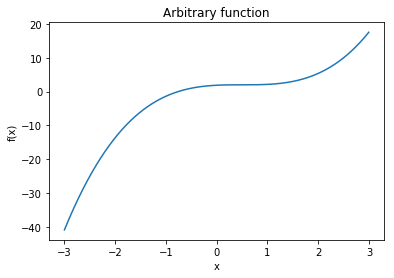

In [5]:
# define range of x-axis
x=(np.arange(1200)-600.)/200
# calculate y as a function of x
y=(x-0.5)**3+2
# plot
plt.plot(x,y)
plt.title("Arbitrary function")
plt.ylabel("f(x)")
plt.xlabel("x")

**图 4.1.3**：图为上例中的任意函数

**Figure 4.1.3**: Plot of our arbitrary function

假设函数的 $x$ 取值范围为 $[-2, 2]$，即区间间隔为4，也就是我们将要表达的函数的区间大小，并且函数在此区间内可积。因此，可以在感兴趣的区间使用傅里叶级数来表达上述函数，公式如下：

<center>$\displaystyle f(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\inf}[a_n\cos(w_n t) + b_n \sin(w_n t)]$</center>

其中：

<center>$\displaystyle w_n = \frac{2\pi n}{x_1-x_0}$</center>

<center>$\displaystyle a_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \cos(w_n t)dt $</center>

<center>$\displaystyle b_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \sin(w_n t)dt $</center>

注意：$a_0$ 前面的系数为0.5.
当然，在实际情况下不可能得到 $n\rightarrow\infty$ 的上限。因此，我们尝试使用不同的 $n_{max}$ 值来近似表达上述函数。

***
Let us now consider that we are only interested in this function in the range $x=[-2,2]$. Our interval is thus 4: the period over which we will replicate our initial function $f(x)$ will be 4. Our function here is definitely integrable over the period of interest; we can thus perform a Fourier series and try to replicate our function over our interval of interest. The formula to do so is as follows:

<center>$\displaystyle f(t) = \frac{1}{2}a_0 + \sum_{n=1}^{\inf}[a_n\cos(w_n t) + b_n \sin(w_n t)]$</center>

with

<center>$\displaystyle w_n = \frac{2\pi n}{x_1-x_0}$</center>

<center>$\displaystyle a_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \cos(w_n t)dt $</center>

<center>$\displaystyle b_n = \frac{2}{x_1-x_0}\int_{x_0}^{x_1} f(t) \sin(w_n t)dt $</center>

Note the factor of 0.5 in front of $a_0$.

In practice, of course, the upper limit of $n\rightarrow\infty$ is not achievable. Let us try to replicate the arbitrary function above using different values of $n_{max}$.

2.0 -4.0 -3.995


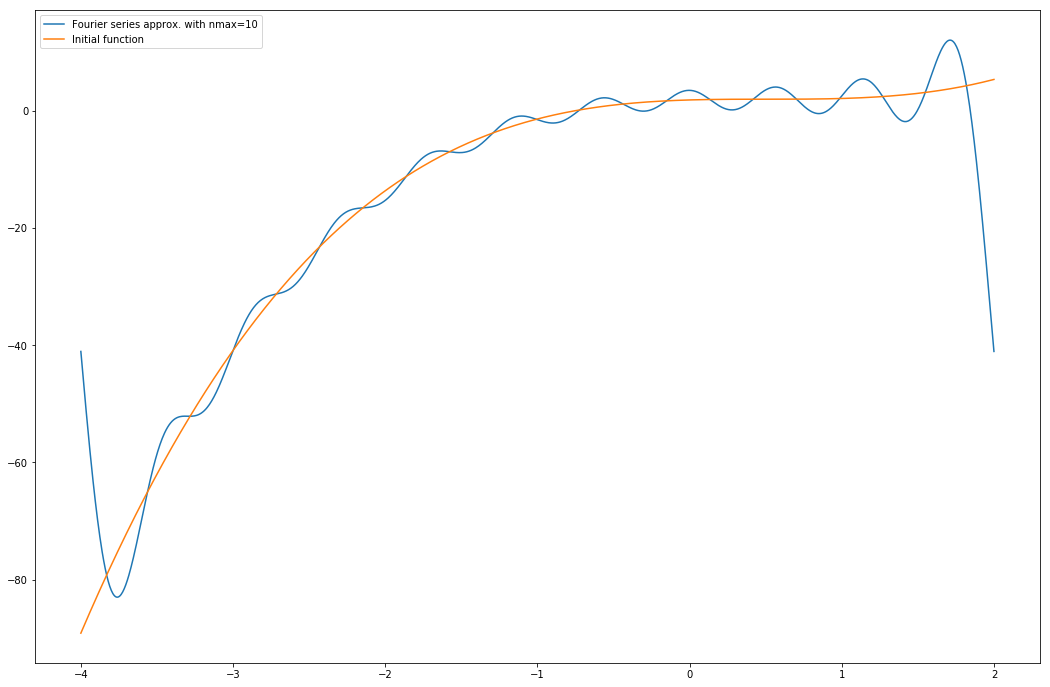

In [11]:
nmax=10
x=(np.arange(1201)-800.)/200
y=(x-0.5)**3+2
# print(x)

def FourierSeriesApprox(xvals,yvals,nmax):
    approx=np.zeros_like(yvals)
    T=(xvals[-1]-xvals[0])
    w=2*np.pi/T
    dt=xvals[1]-xvals[0]
    approx=approx+1/T*(np.sum(yvals)*dt)
    for t in range(len(xvals)):
        for n in (np.arange(nmax)+1):
            an=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
            bn=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt
            approx[t]=approx[t]+an*np.cos(w*n*xvals[t])+bn*np.sin(w*n*xvals[t])
    return approx
        
yApprox=FourierSeriesApprox(x,y,nmax)
#plt.plot(x,y)
plt.figure(figsize=(18,12))
plt.plot(x,yApprox,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x,y,label="Initial function")
plt.legend(loc="upper left")

**图 4.1.4**：任意函数及其对于给定级数的傅里叶级数的近似

**Figure 4.1.4**: Overlay of our arbitrary function and its Fourier series approximation for a given number of Fourier coefficients

可以注意到，在拟合周期和采样周期不同的情况下，拟合在边缘处情况更糟糕，采样边缘存在偏差，这是因为正弦和余弦必须在某一点重复。

<div class=warn>
每个 $n$ 对应于一个给定的函数在采样范围中的空间频率，在某些频率上，周期函数比傅里叶级数有更好的拟合功能。这也就是傅里叶级数的重点：我们要努力寻求一个可以包含大部分信息的尺度。随着 $n_{max}$ 的增大，我们可以获得越来越多的细节；随着$n_{max}$ 趋近无穷，就可以更好地处理不连续性。
</div>

物理学家倾向于用能量来讨论这个问题。每一个特征量包含一定的信息，即函数的一部分能量。例如，如果函数是常数，则傅里叶级数中的特征量为常数项 (i.e. $a_0$)；等价地，可以说函数的所有能量集中在 $a_0$。我们讨论功率的原因将在 [$\S$ 4.1.2.3 &#10549;](#vis:sec:ps) 中解释。

注意，傅里叶级数还可以写成复指数的形式，如下：

<center>
\begin{align}\displaystyle
f(t) &= \sum_{n=-N}^N c_n e^{i w_n x}\\
w_n  &= \frac{2\pi n}{x_1-x_0}\\
c_n  &= \frac{1}{x_1-x_0} \int_{x_0}^{x_1} f(t) \cdot e^{-i w_n x}dx
\end{align}</center>


***
Note that our fit becomes worse at the edges if we are fitting a function with a different period than our sampling period. This is because our sines and cosines must repeat at some point - hence the divergence at the edges of our sampling.

<div class=warn>
Each $n$ corresponds to a given *spatial frequency* of our function over the sampling range: there are certain frequencies for which our periodic functions prove better "fits" for our function. This is the **key point** of Fourier analysis: we seek to find what scales contain most of our function's information. As $n_{max}$ increases, we pick up finer and finer detail; as it tends to infinity, we get closer to being able to deal with discontinuities.
</div>

Physicists tend to discuss this in terms of energy. Each characteristic scale has a certain amount of information - a certain amount of "energy" from the function's total energy budget. If the function is constant, for example, we know that the characteristic scale will be in the constant term in the Fourier series (i.e. $a_0$): equivalently, we can say that all the function's power is concentrated in $a_0$. The reason we talk about "power" is explained in [$\S$ 4.1.2.3 &#10549;](#vis:sec:ps).

Note that the Fourier series can also be written in terms of a complex exponential as follows:

<center>
\begin{align}\displaystyle
f(t) &= \sum_{n=-N}^N c_n e^{i w_n x}\\
w_n  &= \frac{2\pi n}{x_1-x_0}\\
c_n  &= \frac{1}{x_1-x_0} \int_{x_0}^{x_1} f(t) \cdot e^{-i w_n x}dx
\end{align}</center>

##### 4.1.2.2 傅里叶变换
##### 4.1.2.2 Fourier Transform

<span style="background-color:red">TLG:MC: Very important but merge into 2.4.</span>

在上述实例中，我们在一个有限的时间段内，得到了与离散空间频率相关的权重。然而，为什么要限制在离散空间频率呢？实际上，只要 $n_{max}$ 足够大，我们就可以得到函数的傅里叶级数的连续采样。

考虑函数在全范围内 (i.e. $[x_0,x_1]\rightarrow[-\infty,\infty]$) 的无限精细空间采样，可以采用复函数的指数形式定义函数 $f$ 的傅里叶变换 $\tilde{f}$。傅里叶级数的更详细数学细节见 [$\S$ 2.4. &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb)。

<center> $\displaystyle \tilde{f}(s) = \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s} dt$ </center> 

换句话说，对于每个频率，我们构造了与函数 $f(t)$ 中的频率相关的尺度相对权重的连续描述。就本节而言，（就我们的分析而言），关于傅里叶级数的描述均适用于傅里叶变换，后者是前者的普遍（一般）情况。

<div class=advice>
注意，上述变换适用于时间频率和空间频率，后者是天文学家更感兴趣的。对（二维）天空图像进行（二维）傅里叶变换，可以找到源的信号所在位置。更重要的是，反之依然成立：我们可以从信息足够的傅里叶平面重建得到图像。
</div>


***
In the example above, we have taken a *limited time band* and found weights associated with *discrete spatial frequencies*. However, why should we restrict ourselves to *discrete* spatial frequencies? Indeed, with sufficiently large $n_{max}$, we should approach a *continuous* sampling of our function's Fourier coefficients.

By considering our function over its full range (i.e. $[x_0,x_1]\rightarrow[-\infty,\infty]$) and sampling infinitesimally finely in space, we can thus take the complex exponential form of the Fourier series to define the Fourier transform $\tilde{f}$ of a function $f$ defined in 
Note that Fourier series are covered in greater mathematical detail in [$\S$ 2.4. &#10142;](../2_Mathematical_Groundwork/2_4_the_fourier_transform.ipynb):

<center> $\displaystyle \tilde{f}(s) = \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s} dt$ </center> 

In other words, we create a *continuous* description <span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span>, for every frequency, of the relative "weight" of the scale associated with that frequency in our function $f(t)$. For the purposes of this section, that is as far as we will take our analysis; everything that's been said about Fourier series holds for Fourier transforms, which are a more general case of the former.

<div class=advice>
Note that this works for both *time* frequencies and *spatial* frequencies. <span style="background-color:cyan">TLG:GM: Are these definitions in the glossary?</span> This latter quantity is what interests us as astronomers - by taking the (2-dimensional) Fourier transform of a (2-dimensional) image of the sky, we can find where the light of our sources lies. Most importantly, **the reverse is true**: we can recreate an image if we know its Fourier space well enough!
</div>

<span style="background-color:cyan">TLG:ST: Use a note style</span>
<span style="background-color:red">TLG:GC: See the comments about the figures below.</span>

##### 4.1.2.2.1 边界问题
##### 4.1.2.2.1 Boundary Problems
<span style="background-color:red">TLG:MC: Very important but merge into 2.4.</span>

<span style="background-color:cyan">TLG:GN: Are F Transform and Series in Glossary? Italic them too.</span>

相比于傅里叶级数，傅里叶变换的一个优势在于不受边界的影响。对于以下简单的正弦波：

<center> $f(x) = sin(4x)$ </center>

如果我们试图找到该函数在一个特定范围（非其周期的倍数）上的傅里叶系数，那么，可能会遇到问题。请阅读以下代码：


***
One key advantage Fourier transforms hold over Fourier series is that we are no longer beholden to poorly-set boundaries. Consider a simple sine wave of the following form:

<center> $f(x) = sin(4x)$ </center>

If we try to find the Fourier coefficient for this function over a range other than a multiple of its period, then we may run into problems. Observe:

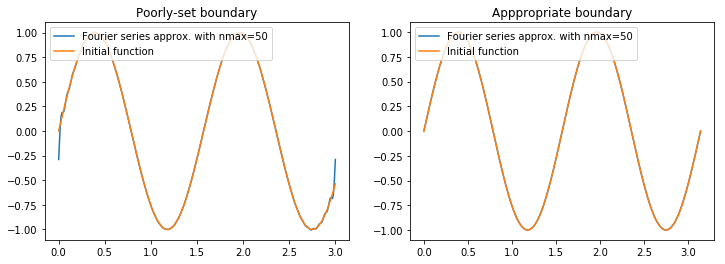

In [13]:
def FourierSeriesApprox(xvals,yvals,nmax):
    approx=np.zeros_like(yvals)
    T=(xvals[-1]-xvals[0])
    w=2*np.pi/T
    dt=xvals[1]-xvals[0]
    approx=approx+1/T*(np.sum(yvals)*dt)
    for t in range(len(xvals)):
        for n in (np.arange(nmax)+1):
            an=2/T*np.sum(np.cos(w*n*xvals)*yvals)*dt
            bn=2/T*np.sum(np.sin(w*n*xvals)*yvals)*dt
            approx[t]=approx[t]+an*np.cos(w*n*xvals[t])+bn*np.sin(w*n*xvals[t])
    return approx

nmax=50
x=(np.arange(1201))/400.
y=np.sin(4*x)
yApprox=FourierSeriesApprox(x,y,nmax)

x1=(np.arange(601-300)*np.pi)/300
y1=np.sin(4*x1)
y1Approx=FourierSeriesApprox(x1,y1,nmax)

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(x,yApprox,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x,y,label="Initial function")
plt.legend(loc="upper left")
plt.title("Poorly-set boundary")
#plt.show()
plt.subplot(1,2,2)
plt.plot(x1,y1Approx,label="Fourier series approx. with nmax=%i"%nmax)
plt.plot(x1,y1,label="Initial function")
plt.legend(loc="upper left")
plt.title("Apppropriate boundary")
plt.show()

**图 4.1.5**：若区间选取合适，则可以用单个傅里叶系数表示某个函数；若边界设置不当，即使无限的傅里叶系数也不足以很好地拟合。

**Figure 4.1.5**: With an appropriate choice of boundaries, can replicate a function with a single Fourier coefficient - with poor boundary choice, even an infinite amount of Fourier coefficients will not suffice.

上述函数的唯一不同之处是画图区间不同（i.e. $x_{min}$ and $x_{max}$）。在第一种情况下，区间为[0,3], 而第二种情况区间为[0, $\pi$]。虽然只是改变了函数的区间边界，在第二种情况下当 $n_{max}=2$ 时就可以得到精确的结果。这里的要点是我们函数的特征傅里叶尺度没有变化 - 但边界误差设置不当导致在测试尺度大小时出现问题。

而傅里叶变换在所有空间上进行采样，而不在原始函数的任何给定特征尺度的时间段内进行采样，因此不存在上述边界问题。

***
The only change between those two functions is the range over which they are plotted (i.e. $x_{min}$ and $x_{max}$). In the first case, we go from 0 to 3, and in the second case from 0 to $\pi$. Although we have only changed our function's boundaries, we get the **exact** result with $n_{max}=2$ in the second case! The point here is the **characteristic Fourier scales of our function are unchanged** - but that **boundary errors** - poorly-set boundaries, in other words - can cause issues when trying to retrieve these scales.

Fourier transforms do not have this problem: they sample over all space, and therefore never sample under the period of any given characteristic scale of our original function. 


##### 4.1.2.2.2 正弦函数的傅里叶变换
##### 4.1.2.2.2 Fourier transform of a sine function

通过 $n_{max}=2$ 恢复了函数，并且知道相应的边界设置为 $x=[0,\pi/2]$，依然存在一系列问题：有多少非零的傅里叶系数？其值是多少？在恰当边界及 $n_{max}=1$ 时会得到什么什么结果，会说明什么问题？

正弦函数为奇函数，在设定范围内的积分为0，即 $a_0 = 0$。同样地，由于函数为奇函数，所有的 $b_n$ 均为0，函数没有偶数特征尺度。
<span style="background-color:yellow"> 由于函数在区间上的平均值为0， $a_1$ 为0，而 $a_2$ 将以傅里叶系数  $w_n$ 表达该函数。</span>

采用更大的 $n_{max}$ 可以改变不适当边界对傅里叶级数的影响，但对于合理设置的边界则效果不大，自己可以通过修改代码参数去尝试。这也就是说明，在合理设置边界的情况下，$a_{n \ne 2} = 0$。相比之下，傅里叶变换则没有边界问题：上述函数的一维傅里叶变换结果是什么？函数$f(x) = \cos(2x) $的傅里叶变化结果又是什么？


实际上，图像平面中的正弦（或余弦）等效于uv平面中的一个点：正弦或余弦函数的傅里叶变换是在函数频率上的狄拉克函数。 射电天文学家在讨论*干涉条纹时所指的也正是与UV平面点相关的图像平面周期函数。


***
Having recovered our function with $n_{max}=2$, and knowing that the boundaries used to do so were $x=[0,\pi/2]$: how many non-zero Fourier coefficients do we have, and what's their value? What do we get with the right boundaries and $n_{max}=1$, and what does that tell us?

We know that the function is odd, so the integral over the range will be zero: $a_0 = 0$. Similarly, because the function is odd, all $b_n$ will be zero, since our function has no even characteristic scales. $a_1$ will be zero, because the function averages to zero over the periods this function investigates. $a_2$, however, will pick up the exact function: it has the correct $w_n$!

Putting a larger $n_{max}$ will change the poorly-bound Fourier series, but not the appropriately-bound one; you can try this for yourself. This means that, in the appropriately-bound case, all $a_{n \ne 2} = 0$ ! Knowing that Fourier transforms never suffer from boundary problems: what is the 1-D Fourier transform of this function? What would it be for $f(x) = \cos(2x) $ ?

<div class=warn>
As it happens, a sine (or cosine) in the image plane is equivalent to a **point** in the uv-plane: the Fourier transform of a sine or cosine is a *Dirac delta* placed at the function's frequency. This is what radio astronomers refer to when they talk about *interference fringes*: they are talking about the image-plane periodic function associated with a uv-plane point.
</div>


##### 4.1.2.2.3 狄拉克函数的傅里叶变换
##### 4.1.2.2.3 Fourier transform of a Dirac delta

对于非空图像中心点源的极端情况（即图像只有一个白色的像素点），通常用狄拉克函数描述，见 [$\S$ 2.2 &#10142;](../2_Mathematical_Groundwork/2_2_important_functions.ipynb)：

* 无限小的区域

* 无限高

* 不变的区域： $\int_{-\infty}^{+\infty} \delta(x)dx = 1$

换句话说，可以把狄拉克函数看作高斯函数在保持函数曲线下方区域面试恒定时，$\sigma \rightarrow 0$ 和 $A\rightarrow\infty$ 的极值。

假设在一个一维图像中有一个点源，什么样的尺度能最好的表达图像？如考虑他的傅里叶变换（因此也不用考虑边界问题），可以得到以下：

<center> \begin{align}
\displaystyle {f}(t) &= \delta(t)\\
\displaystyle \tilde{f}(s) &= \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s}\\
                           &= \int_{-\infty}^{\infty} \delta(t) e^{-i2\pi t s} dt
\end{align} </center> 

结合狄拉克函数的定义，可以得到：

<center> $\displaystyle \tilde{f}(s) =  e^{-i2\pi \cdot0\cdot s} = 1$ </center> 

因此，点源的傅立叶变换在所有傅立叶空间中是常数，这对*条纹*（每一个条纹对应一个傅里叶组成函数或者空间频率）意味着什么？显而易见，每个条纹对应一个点源，这在空间尺度同样存在。 如果对狄拉克函数进行平移会发生什么？


***
Consider the extreme case of a point source sitting in the middle of an otherwise empty image (i.e. only one white pixel on an otherwise black image). This is typically described by using a Dirac delta - as defined in [$\S$ 2.2 &#10142;](../2_Mathematical_Groundwork/2_2_important_functions.ipynb):

* Infinitely thin

* Infinitely high

* Constant area: $\int_{-\infty}^{+\infty} \delta(x)dx = 1$

In other words, you can think of the Dirac delta as the limit where a Gaussian has $\sigma \rightarrow 0$ and $A\rightarrow\infty$, while keeping the area under the Gaussian a constant.


If we have a 1-dimensional image (i.e. a row of pixels on your computer screen) with a point source (i.e. only one pixel is activated - it thus contains a Dirac delta), what scale is most representative of our image? If we consider its Fourier transform (thus freeing us from questions of boundary), we get the following:

<center> \begin{align}
\displaystyle {f}(t) &= \delta(t)\\
\displaystyle \tilde{f}(s) &= \int_{-\infty}^{\infty} f(t) e^{-i2\pi t s}\\
                           &= \int_{-\infty}^{\infty} \delta(t) e^{-i2\pi t s} dt
\end{align} </center> 

By the definition of the Dirac delta, this immediately gives us:

<center> $\displaystyle \tilde{f}(s) =  e^{-i2\pi \cdot0\cdot s} = 1$ </center> 

The Fourier transform of a point source (i.e. a single-pixel source. In terms of an astronomical image - an image of the sky - this is the definition of an *unresolved* source) is therefore a constant across all Fourier space. What does this mean in terms of *fringes* (each of which corresponds to **one** Fourier component or *spatial frequency*)? Quite simply that **every fringe** picks up the point source; it is **equally present** at **all spatial scales**. What happens if the Dirac delta is shifted? 


对于一个二维图像上的点源，如果其坐标为 $(x_0,y_0)$, 则描述图像中亮度分布的函数 ${f}(x,y)$ 应当是：

<center> $\displaystyle {f}(x,y) = \delta(x-x_0)\delta(y-y_0)$ </center> 

对应的傅里叶平面为：

<center> 
\begin{align}
\displaystyle 
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x
\end{align}</center>

注意， $k_x$ 和 $k_y$ 为图像中的空间频率，分别是 $x$ 和 $y$方向。将 $f(x,y)$ 代入公式，并结合狄拉克函数，可以得到：

<center>\begin{align}
\displaystyle \tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} \delta(x-x_0)\delta(y-y_0) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\displaystyle \\
                                 &= e^{-i2\pi (k_x\cdot x_0 + k_y\cdot y_0)}
\end{align}</center>

如果源位于图像的正中心（$x_0=y_0=0$），则对应的傅里叶平面为常数；若不在中心（用射电干涉阵的术语，即为不在相位中心，相应的知识在后续章节中国有明确说明），则傅里叶空间由两个复杂波的线性组合组成。换句话说，不在图像中心的狄拉克函数在 $uv$-平面（i.e. 傅里叶空间）产生了条纹，其周期与其位置直接相关。也就是说，**傅立叶空间中的条纹图案对应于图像平面中的点源**。

***
Let us consider a point source in a 2-dimensional image. If the source is located at coordinates $(x_0,y_0)$, then the function ${f}(x,y)$ describing the brightness distribution in our image (in our extended example, which single pixel is activated - at $x_0,y_0$) would be:

<center> $\displaystyle {f}(x,y) = \delta(x-x_0)\delta(y-y_0)$ </center> 

And the corresponding Fourier space:

<center> 
\begin{align}
\displaystyle 
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x
\end{align}</center>

Note that here, we define $k_x$ and $k_y$ to be the *spatial frequencies* in our image, in the $x$ and $y$ directions respectively. Again, by plugging $f(x,y)$ into this equation and using the definition of the Dirac delta, we immediately find:

<center>\begin{align}
\displaystyle \tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} \delta(x-x_0)\delta(y-y_0) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\displaystyle \\
                                 &= e^{-i2\pi (k_x\cdot x_0 + k_y\cdot y_0)}
\end{align}</center>

If our source is at the centre of the image ($x_0=y_0=0$), then we recover our first result: the Fourier plane corresponding to our source is constant. If, however, our source is **not** in the centre of the image (in radio interferometric parlance, if it is not at **phase centre** - the reason for this name will be made explicit in later chapters), then our Fourier space consists of the linear combination of two complex waves. In other words, a Dirac delta not located in the centre of the image plane creates **a fringe pattern in the $uv$-plane** (i.e. Fourier space), the periods of which are directly related to its position. In other words, **a fringe pattern in Fourier space corresponds to a point source in the image plane**.

##### 4.1.2.2.4 高斯函数的傅里叶变换
##### 4.1.2.2.4 Fourier transform of a Gaussian

在实际情况下，天空中极少数的源是简单的点源，更普遍的源是二维高斯：

<big><center> $\displaystyle f(x,y) = a e^{-\frac{(x-\mu_x)^2}{2\sigma_x^2}}e^{-\frac{(y-\mu_y)^2}{2\sigma_y^2}} = a e^{-\frac{(x-\mu_x)^2+(y-\mu_y)^2}{2(\sigma_x^2+\sigma_y^2)}}$ </center></big>

通过对 $\mu_x,\mu_y,\sigma_x,\sigma_y$ 取不同的值，可以描述所有的“blob-like”状的源，更复杂的源可以通过多个高斯的组合来描述。一个简单高斯源的 $uv$ 平面是什么样子？在我们的例子中，由于 $f(x,y) = f(x)f(y)$，可以将二维傅里叶拆分成两个一维傅里叶积分的乘积，并结合 2.4.2 节：

<center> 
\begin{align}
\displaystyle
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\\
                   &= \int_{-\infty}^{\infty} f(x) e^{-i2\pi k_x\cdot x} dk_x \int_{-\infty}^{\infty} f(y) e^{-i2\pi k_y\cdot y} dk_y\\
                   &= a e^{-\imath 2\pi \mu_x k_x}\,\sqrt{2\pi}\sigma_x\,e^{-2\pi^2k_x^2\sigma_x^2} e^{-\imath 2\pi \mu_y k_y}\, \sqrt{2\pi}\sigma_y\,e^{-2\pi^2k_y^2\sigma_y^2}\\
                   &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)}e^{-i 2\pi (\mu_x k_x + \mu_y k_y)}
\end{align}</center>

如果高斯源位于相位中心 (i.e. $\mu_x=\mu_y=0$)，我们将使用另一个高斯：

<center>\begin{align}
\tilde{f}(k_x,k_y) &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)} e^0\\
                   &= 2\pi a \sigma_x \sigma_y e^{-(\frac{k_x^2}{2\sigma_{kx}^2}+\frac{k_y^2}{2\sigma_{ky}^2})}\\
\sigma_{kx}        &= \frac{1}{2\pi\sigma_x}\\
\sigma_{ky}        &= \frac{1}{2\pi\sigma_y}
\end{align}</center>

换句话说，$uv$平面高斯的宽度直接给出原始高斯的宽度。如果原始高斯不在相位中心，我们得到的是高斯与$uv$平面条纹的乘积。条纹的周期仅由 $(\mu_x,\mu_y)$ 决定，因此可以给出高斯位置信息。


***
In practice, few sources in the sky are simple point sources. A more "physical" source is a two-dimensional Gaussian:

<big><center> $\displaystyle f(x,y) = a e^{-\frac{(x-\mu_x)^2}{2\sigma_x^2}}e^{-\frac{(y-\mu_y)^2}{2\sigma_y^2}} = a e^{-\frac{(x-\mu_x)^2+(y-\mu_y)^2}{2(\sigma_x^2+\sigma_y^2)}}$ </center></big>


With different values of $\mu_x,\mu_y,\sigma_x,\sigma_y$, all sorts of "blob-like" sources can be described. More complex sources can be described as a combination of multiple Gaussians. What does the uv-plane of a simple Gaussian source look like? In our case, since $f(x,y) = f(x)f(y)$, we can split the two-dimensional Fourier integral into the product of two one-dimensional Fourier integrals and use the result from Section 2.4.2:

<center> 
\begin{align}
\displaystyle
\tilde{f}(k_x,k_y) &= \int_{-\infty}^{\infty} f(x,y) e^{-i2\pi (k_x\cdot x + k_y\cdot y)} dk_y dk_x\\
                   &= \int_{-\infty}^{\infty} f(x) e^{-i2\pi k_x\cdot x} dk_x \int_{-\infty}^{\infty} f(y) e^{-i2\pi k_y\cdot y} dk_y\\
                   &= a e^{-\imath 2\pi \mu_x k_x}\,\sqrt{2\pi}\sigma_x\,e^{-2\pi^2k_x^2\sigma_x^2} e^{-\imath 2\pi \mu_y k_y}\, \sqrt{2\pi}\sigma_y\,e^{-2\pi^2k_y^2\sigma_y^2}\\
                   &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)}e^{-i 2\pi (\mu_x k_x + \mu_y k_y)}
\end{align}</center>

If our Gaussian is located at phase centre (i.e. if $\mu_x=\mu_y=0$), then  we are left with another Gaussian:

<center>\begin{align}
\tilde{f}(k_x,k_y) &= 2\pi a \sigma_x \sigma_y e^{-2\pi^2 (k_x^2 \sigma_x^2 + k_y^2 \sigma_y^2)} e^0\\
                   &= 2\pi a \sigma_x \sigma_y e^{-(\frac{k_x^2}{2\sigma_{kx}^2}+\frac{k_y^2}{2\sigma_{ky}^2})}\\
\sigma_{kx}        &= \frac{1}{2\pi\sigma_x}\\
\sigma_{ky}        &= \frac{1}{2\pi\sigma_y}
\end{align}</center>

In other words, the width of our uv-plane Gaussian directly tells us the width of the original Gaussian. If our original Gaussian is located somewhere other than phase centre, we now get a Gaussian multiplied with a fringe pattern in $k$-space (i.e. in the uv-plane). The period of these fringes depends only on $(\mu_x,\mu_y)$ and therefore tell us where the Gaussian is located.

### 4.1.3 图像和傅里叶平面的关系
### 4.1.3 Relationship between Image and Fourier planes

到目前为止，我们将讨论范围限制在当个源的图像。当然，实际情况下，天空中的源远不止一个，那么包含多个源的图像的傅里叶平面是怎么样呢？

假设一个图像包含有 $n$ 个任意形状的源，每一个源由一个函数  $f_n(x,y)$ 定义，图像上不同位置的点的值计算如下：

<center>
\begin{align}\displaystyle
B(x,y) &= \sum_n f_n(x,y)
\end{align}</center>

对应的傅里叶平面，即  $B(x,y)$ 的傅里叶变换如下：

<center>
\begin{align}\displaystyle
\tilde{B}(k_x,k_y) &= \text{FT}\big[B(x,y)\big]\\
                   &= \text{FT}\bigg[\sum_n f_n(x,y)\bigg]\\
                   &= \sum_n \text{FT}\bigg[f_n(x,y)\bigg]\\
\end{align}</center>

换句话说，图像的傅立叶平面由每个单独源的傅里叶分量的线性和组成。 这意味着，在实践中，“读取”给定图像的傅立叶平面就可以了，但是这几乎是不可能的！ Some mighty wizards can and do practice such high magic, but they are few and far between.


***
So far, we have restricted our analyses to images with a single source. Of course, we know that the sky has a lot more than a single source - what then of the Fourier plane of images with more than a single source?

Let us consider an image with $n$ sources of arbitrary shapes, each defined by a functions $f_n(x,y)$. The value of this image at different positions would then be given by:
<center>
\begin{align}\displaystyle
B(x,y) &= \sum_n f_n(x,y)
\end{align}</center>

The corresponding Fourier plane, then, would be the Fourier transform of $B(x,y)$:

<center>
\begin{align}\displaystyle
\tilde{B}(k_x,k_y) &= \text{FT}\big[B(x,y)\big]\\
                   &= \text{FT}\bigg[\sum_n f_n(x,y)\bigg]\\
                   &= \sum_n \text{FT}\bigg[f_n(x,y)\bigg]\\
\end{align}</center>

In other words, the Fourier plane of our image consists of the linear sum of the Fourier components of each individual source. This means that, in practice, "reading" the Fourier plane of a given image is all but impossible! Some mighty wizards can and do practice such high magic, but they are few and far between.

之所以在射电干涉阵中要强调这一点，是因为干涉仪不对图像平面进行采样，而是 **直接对傅里叶平面采样**。本章接下来的内容给将主要讲述在实际过程中，如何完成，并且对这种做法的限制进行分析，寻求避免的方法。


Why is this relevant? Because interferometers do not sample the image plane: they **directly sample the Fourier plane**. The remainder of this chapter will be dedicated to outlining how this is done in practice, and the constraints this choice imposes (and avoids!).

#### Format status:
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : LF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : NC: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : RF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : HF: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : GM: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : CL: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : ST: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : FN: 2017/02/06
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : SP: 2017/02/06
* <span style="background-color:red">&nbsp;&nbsp;&nbsp;&nbsp;</span> : TC: Date
* <span style="background-color:green">&nbsp;&nbsp;&nbsp;&nbsp;</span> : XX: 2017/02/06

***

* Next: [4.2 The Baseline and its Representation in Space](4_2_the_baseline_and_its_representation_in_space.ipynb)